###  Problema: Oscilador Armónico Simple

Queremos resolver la siguiente **ecuación diferencial de segundo orden**:


\begin{cases}
y''(t) = -y(t), \\
y(0) = 1, \\
y'(0) = 0,
\end{cases}


en el intervalo $ t \in [0, 2\pi] $, usando el método de **Runge-Kutta de orden 4 (RK4)** con  N  pasos.

---

###  Reducción a un sistema de primer orden

Para aplicar métodos numéricos como RK4, transformamos la ecuación de segundo orden en un **sistema de ecuaciones de primer orden**.

Definimos el siguiente cambio de variables:

\begin{aligned}
y_1(t) &= y(t), \\
y_2(t) &= y'(t),
\end{aligned}

entonces:

\begin{aligned}
y_1'(t) &= y_2(t), \\
y_2'(t) &= -y_1(t),
\end{aligned}

con condiciones iniciales:

$y_1(0) = 1, \quad y_2(0) = 0.$

Así, el sistema resultante es:

\begin{cases}
y_1' = y_2, \\
y_2' = -y_1,
\end{cases}
$\quad \text{con }$ \begin{cases}
y_1(0) = 1, \\
y_2(0) = 0.
\end{cases}

Este sistema es equivalente a la ecuación original y puede resolverse con el método RK4 vectorial.


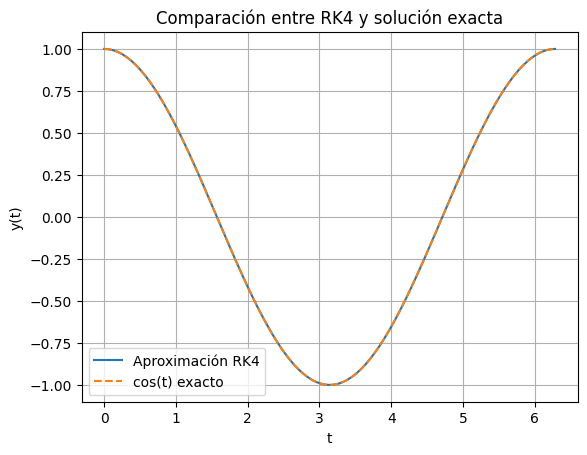

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return np.array([y[1], -y[0]])

def rk4_step(y, t, f, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    k3 = f(t + h/2, y + h/2 * k2)
    k4 = f(t + h, y + h * k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

# Condiciones iniciales
y0 = np.array([1.0, 0.0])  # y(0) = 1, y'(0) = 0
T = 2*np.pi
N = 100
h = T / N

# Inicializar solución
t_vals = [0]
y_vals = [y0]
y = y0.copy()

for k in range(N):
    t = k * h
    #print(y)
    y = rk4_step(y, t, f, h)
    t_vals.append(t + h)
    y_vals.append(y)

y_vals = np.array(y_vals)
plt.plot(t_vals, y_vals[:,0], label='Aproximación RK4')
plt.plot((np.linspace(0, 2*np.pi, 1000)), np.cos(np.linspace(0, 2*np.pi, 1000)), '--', label='cos(t) exacto')
plt.legend()
plt.title("Comparación entre RK4 y solución exacta")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid()
plt.show()
